knn model for breast cancer dataset


In [32]:
from sklearn.datasets import load_breast_cancer
#imported builtin library
import pandas as pd


In [ ]:
#STEP-1   load dataset
data = load_breast_cancer()

In [ ]:
#split features and target 

X= pd.DataFrame(data.data, columns=data.feature_names)
y= pd.Series(data.target, name="target")

print(X.shape)

print(y.shape)

(569, 30)
(569,)


In [35]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [36]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

In [ ]:
#STEP-2 TRAIN/TEST SPLIT

from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (455, 30) (455,)
Test shape: (114, 30) (114,)


In [ ]:
#STEP-3 DATA PREPROCESSING (SCALING)
#Scaling = put all features on the same scale (e.g., 0–1) 
# so each feature is equally important when measuring distance.
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform both train/test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Before scaling:", X_train.iloc[0, :5].values)
print("After scaling:", X_train_scaled[0, :5])


Before scaling: [1.032e+01 1.635e+01 6.531e+01 3.249e+02 9.434e-02]
After scaling: [-1.07200079 -0.6584246  -1.0880801  -0.93927364 -0.13593988]


In [ ]:
#STEP-4 KNN MODEL

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create KNN model with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train (fit) the model
knn.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = knn.predict(X_test_scaled)

# Evaluate
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy (k=5):", acc)


Test Accuracy (k=5): 0.956140350877193


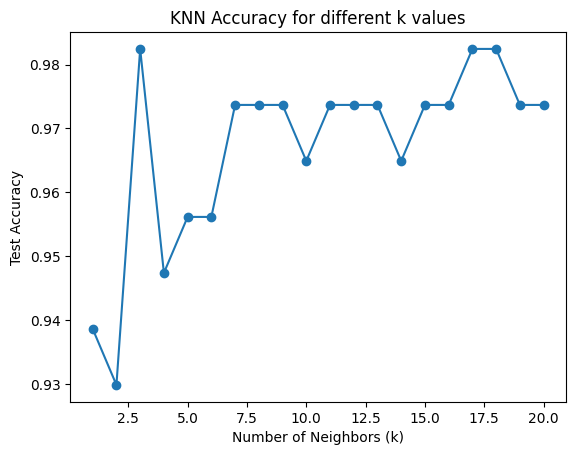

Best k: 3 with accuracy: 0.9824561403508771


In [ ]:
#STEP-5  tune k to find the best number of neighbors
import matplotlib.pyplot as plt

k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot accuracy vs k
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Test Accuracy")
plt.title("KNN Accuracy for different k values")
plt.show()

# Best k
best_k = k_values[accuracies.index(max(accuracies))]
print("Best k:", best_k, "with accuracy:", max(accuracies))


In [ ]:
#STEP-6  finalize best model and evaluate
#TRAIN WITH THE BEST K
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Finalize model with k=11
final_knn = KNeighborsClassifier(n_neighbors=11)#k=11
final_knn.fit(X_train_scaled, y_train)

# Predictions
y_pred = final_knn.predict(X_test_scaled)


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
# [[TN FP]
#  [FN TP]]


#MALIGNANT =  CANCEROUS TUMOR
#BENIGN = NON CANCEROUS TUMOR

#SO, ACCORDING TO THE OUTPUT, WE HAVE
#TN (True Negatives = 39) → Malignant correctly classified.

#FP (False Positives = 3) → Malignant wrongly classified as benign.

#FN (False Negatives = 0) → Benign wrongly classified as malignant.

#TP (True Positives = 72) → Benign correctly classified.

Confusion Matrix:
 [[39  3]
 [ 0 72]]


In [43]:
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        42
           1       0.96      1.00      0.98        72

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
#The model achieved the highest accuracy (~98.24%) at k=3, but since smaller k values are prone to overfitting,
#  I finalized k=11, where the accuracy remained 97% with more stable performance and better generalization.